In [12]:
import pickle
import numpy as np
import pandas as pd

"""
Change the below variables for a separate car and also dont forget to update the boundary of points in the
kernel estimation graph
"""
obddata = pd.read_csv("1.csv", index_col=0)
obddata = obddata[obddata['tripID']<20]

In [13]:
"""
Simple formula for calculating the complete tyre radius
"""
def get_car_radius(nom_sec, aspect_rat, diam):
    rad = nom_sec * aspect_rat * 0.393701 / 1000 + diam / 2
    return rad

# Values Specified 
#   for Honda Jazz :  175, 55, 15
#   for Hyundai i20 : 185, 65, 14
#   for Honda WRV : 195, 60, 16
#   for Redigo : 155, 80 ,13
#   for Hondo City : 175 ,65 , 15
car_radius = get_car_radius(175, 65, 15)

print(car_radius)

11.978348875000002


In [14]:
"""
Get the gear ratios from some site online. This task is to be automated. Either get the total drive ratio 
or use the list and map example to get the total drive ratio i.e. tdr from the gear ratios and the final drive
ratio
"""

# Honda Jazz
# gear_rats = [15.29, 8.09, 5.42, 3.95, 3.36] 
# Hyundai i20
# tdr = list(map(lambda x : x * 3, [3.769, 2.045, 1.37, 1.036, 0.893, 0.774]))
# Honda WRV
# tdr = list(map(lambda x : x * 3.85, [3.64, 1.88, 1.18, 0.87, 0.71, 0.59]))
# Datsun ReadiGo :
# tdr = list(map(lambda x : x * 3.85, [3.77,2.05,1.29,0.948,0.79]))
# Honda City :
tdr = list(map(lambda x : x * 4.294, [3.461,1.869,1.235,0.948,0.809]))
print(tdr)

tdr = list(map(lambda x : x * 4.562, [2.995,1.678,1.066,0.760,0.551]))
# tdr = [15.29, 8.09, 5.42, 4.27, 3.55]
print(tdr)

def get_df_ratio_gear_wise(car_radius, gear_rats):
    def getdf_rat(gear_rat):
        return 0.00595 * car_radius / (gear_rat)
    
    df_rats = list(map(getdf_rat, gear_rats))
    return df_rats

df_ratios_ideal = get_df_ratio_gear_wise(car_radius, tdr)
df_ratios_ideal = [1000 * x * 1.60934 for x in df_ratios_ideal]
print(df_ratios_ideal)

[14.861533999999997, 8.025485999999999, 5.30309, 4.070711999999999, 3.473846]
[13.663190000000002, 7.655036, 4.863092000000001, 3.4671200000000004, 2.5136620000000005]
[8.394785849573225, 14.983542085501675, 23.585725721830965, 33.08208370983133, 45.630460289422516]


<IPython.core.display.Javascript object>


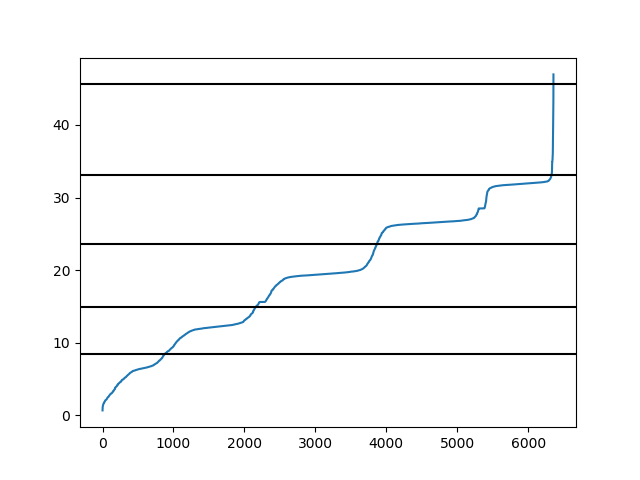

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt

"""
Calculate the df_ratios for the data points and then apply a filter to remove very high values that may arise
due to some errors or noise or due to division by a very small rpm which we dont care about
"""
df_ratio = pd.DataFrame
df_ratio = obddata['speed'] / obddata['rpm']
df_ratio = df_ratio.fillna(0)
df_ratio = df_ratio[df_ratio != 0]
df_ratio = df_ratio*1000
df_ratio.replace(np.inf, np.nan).fillna(0)
df_ratio[df_ratio > 80] = 0

"""
Sort the ratios to get a better view of the graph
"""

sorted_data = df_ratio.sort_values().reset_index(drop=True)
plt.plot(sorted_data)

for rat in df_ratios_ideal:
    plt.axhline(y = rat, color = 'black')
